In [318]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [319]:
# Load the dataset
file_path = 'implant 2.csv'  # Adjust the path accordingly
data = pd.read_csv(file_path)

In [320]:
# Explore the dataset
print(data.head())

    age  cancer  implant
0  61.0       0        0
1  61.0       0        0
2  61.0       0        0
3  61.0       0        0
4  55.0       0        0


In [321]:
#Check for missing value
data.isnull().sum()

age        37
cancer      0
implant     0
dtype: int64

In [278]:
#Data Processing for missing values
data['age'] = data['age'].fillna(data['age'].mean())

In [279]:
#Check for missing value
data.isnull().sum()

age        0
cancer     0
implant    0
dtype: int64

In [280]:
data.describe()

,age,cancer,implant
count,54706.000000,54706.000000,54706.000000
mean,58.543928,0.021168,0.026999
std,10.047484,0.143944,0.162081
min,26.000000,0.000000,0.000000
25%,51.000000,0.000000,0.000000
50%,59.000000,0.000000,0.000000
75%,66.000000,0.000000,0.000000
max,89.000000,1.000000,1.000000


In [281]:
# Split the dataset into features (X) and target variable (y)
X = data[['age', 'implant']]
y = data['cancer']


In [282]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [283]:
# Initialize the logistic regression model
model = LogisticRegression()


In [284]:
# Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [289]:
# Make predictions based on specific input (age,implant) 
y_pred = model.predict([[60,1]])
y_pred

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [290]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [291]:
# Calculate the frequency of each class in y_pred
unique, counts = np.unique(y_pred, return_counts=True)
class_freq = dict(zip(unique, counts))
print(class_freq)

{0: 10942}


In [292]:
# Finding the accuracy of logistic regression
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9788886857978432


In [299]:
classification_report_output = classification_report(y_test, y_pred)
classification_report_output

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

'              precision    recall  f1-score   support\n\n           0       0.98      1.00      0.99     10711\n           1       0.00      0.00      0.00       231\n\n    accuracy                           0.98     10942\n   macro avg       0.49      0.50      0.49     10942\nweighted avg       0.96      0.98      0.97     10942\n'

In [293]:
# Initialize the Decision tress model
model_new = DecisionTreeClassifier()

In [294]:
# Make predictions on the test set
model_new.fit(X_train,y_train)
prediction = model_new.predict(X_test)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Calculate the frequency of each class in prediction
unique, counts = np.unique(prediction, return_counts=True)
class_freq = dict(zip(unique, counts))
print(class_freq)

In [300]:
# Accuracy score using decision trees
score = accuracy_score(y_test,prediction)
score

0.9788886857978432

In [301]:
classification_report_output = classification_report(y_test, prediction)
classification_report_output

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

'              precision    recall  f1-score   support\n\n           0       0.98      1.00      0.99     10711\n           1       0.00      0.00      0.00       231\n\n    accuracy                           0.98     10942\n   macro avg       0.49      0.50      0.49     10942\nweighted avg       0.96      0.98      0.97     10942\n'

In [308]:
# Evaluate the logistic  model
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[10711,     0],
       [  231,     0]])

In [309]:
# Evaluate the decision tree  model
conf_matrix2 = confusion_matrix(y_test, prediction)
conf_matrix2

array([[10711,     0],
       [  231,     0]])

In [311]:
# Calculate the correlation matrix
correlation_matrix = data.corr()
correlation_matrix

,age,cancer,implant
age,1.000000,0.075155,-0.069599
cancer,0.075155,1.000000,-0.014311
implant,-0.069599,-0.014311,1.000000


In [317]:
# Create a cross-tabulation (contingency table)
contingency_table = pd.crosstab(data['cancer'], data['implant'])


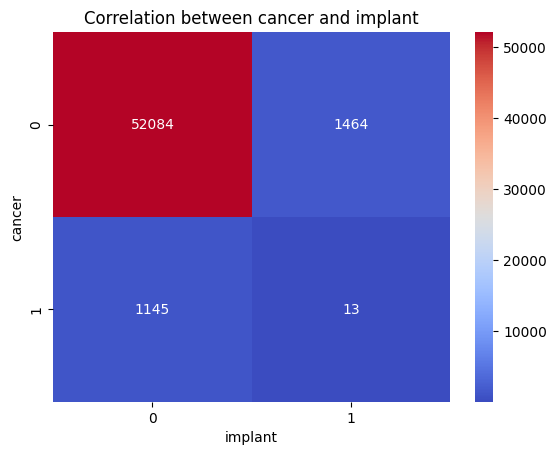

In [315]:
# Plot the cross-tabulation as a heatmap
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt="d")
plt.title('Correlation between cancer and implant')
plt.show()